#### Observations

1) The tempeature drops as we move north of the equator. Cities closer/south of the equator are hotter

2) The wind speed gradually increases as we move away from the equator

3) Cities closer to the quator are more humid compared to the cities which are away (Humidity decreases as we move away from the equator)



In [8]:
#import libraries

import requests
import json
from citipy import citipy
from random import uniform
import pandas as pd
from config import api_key
import time
import matplotlib.pyplot as plt

### Create a list for cities, country, latitude and longitude to hold the values from citypy

In [9]:
city_list = []
country_list = []
latitude = []
longitude = [] 
count = 0

#Randomly generate the lalitude and longitudes to obtain 600 cities

while count <= 600:
    
    lat, long = uniform(-90,90), uniform(-180, 180)
    
    city = citipy.nearest_city(lat, long)
    country = city.country_code
    city = city.city_name
    
#If the city already exists in the list skip it and move to the next row

    if  (city in city_list and country in country_list):
        lat, long = 0, 0
    else:
        city_list.append(city)
        country_list.append(country)
        latitude.append(lat)
        longitude.append(long)
        count = count + 1

city_df = pd.DataFrame({"city":city_list,"country":country_list,"latitude":latitude,"longitude":longitude})

print("Nbr of Cities " + str(city_df["city"].count()))

city_df.head()

Nbr of Cities 601


,city,country,latitude,longitude
0,dikson,ru,82.156174,81.024956
1,matara,lk,-0.151202,80.966918
2,harper,lr,-0.472084,-6.937262
3,busselton,au,-59.997898,94.060863
4,puerto ayora,ec,-13.499661,-108.423947


### Call the API and retreive the city weather. When calling the API add a delay of 1 second 

In [10]:


base = "http://api.openweathermap.org/data/2.5/weather"
count = 0
weather_data = pd.DataFrame(columns=['City','Country','Latitude','Longitude','Max Temp','Cloudiness',
                                     'Humidity','Date','Wind Speed'])


for city in city_df["city"]:
    
    count = count + 1
    
    if count % 20 == 0:
        print(f"{count} nbr of records processed")
    
    params ={"appid":api_key, "q":city, "units":"imperial"}
    
    time.sleep(1)
    response=requests.get(base,params=params)
    print(f"{city}: {response.url}")
    response=response.json()    
    
    try:
        city_name = response["name"]
        clouds = response["clouds"]["all"]
        humidity= response["main"]['humidity']
        dt = response["dt"]
        latitude = response["coord"]['lat']
        longitude = response["coord"]['lon']
        temp = response["main"]['temp_max']
        speed= response["wind"]['speed']
        country = response["sys"]["country"]
        
        weather_data = weather_data.append({'City':city_name,'Cloudiness': clouds, 'Humidity': humidity, 'Date': dt,
                                            'Latitude':latitude,'Longitude':longitude,
                                            'Country':country,'Max Temp':temp,'Wind Speed':speed},ignore_index=True)
    except (ConnectionError, TimeoutError, KeyError) as err:
            message = response["message"] 
            print(f"Error Key {err} and Message is: {message} : {city}")
            
weather_data

dikson: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=dikson&units=imperial
matara: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=matara&units=imperial
harper: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=harper&units=imperial
busselton: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=busselton&units=imperial
puerto ayora: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=puerto+ayora&units=imperial
albany: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=albany&units=imperial
bluff: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=bluff&units=imperial
atuona: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=atuona&units=imperial
kodiak: http://api.openweathermap.org/da

belushya guba: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=belushya+guba&units=imperial
Error Key 'name' and Message is: city not found : belushya guba
praya: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=praya&units=imperial
tasiilaq: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=tasiilaq&units=imperial
jamestown: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=jamestown&units=imperial
upernavik: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=upernavik&units=imperial
vaini: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=vaini&units=imperial
los llanos de aridane: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=los+llanos+de+aridane&units=imperial
mys shmidta: http://api.openweathermap.org/data/2.5/we

lazarev: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lazarev&units=imperial
morada nova: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=morada+nova&units=imperial
coquimbo: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=coquimbo&units=imperial
lusambo: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lusambo&units=imperial
lebu: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lebu&units=imperial
tuatapere: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=tuatapere&units=imperial
shenjiamen: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=shenjiamen&units=imperial
comodoro rivadavia: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=comodoro+rivadavia&units=imperial
glom

dali: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=dali&units=imperial
phan thiet: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=phan+thiet&units=imperial
ostersund: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=ostersund&units=imperial
vernon: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=vernon&units=imperial
yatou: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=yatou&units=imperial
selma: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=selma&units=imperial
elbrus: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=elbrus&units=imperial
200 nbr of records processed
san jeronimo: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=san+jeronimo&units=imperial
port blai

college: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=college&units=imperial
biltine: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=biltine&units=imperial
woodward: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=woodward&units=imperial
fort nelson: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=fort+nelson&units=imperial
souillac: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=souillac&units=imperial
260 nbr of records processed
alcaniz: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=alcaniz&units=imperial
vestmannaeyjar: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=vestmannaeyjar&units=imperial
alyangula: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=alyang

beringovskiy: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=beringovskiy&units=imperial
robertsport: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=robertsport&units=imperial
amderma: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=amderma&units=imperial
Error Key 'name' and Message is: city not found : amderma
centralia: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=centralia&units=imperial
padang: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=padang&units=imperial
suntar: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=suntar&units=imperial
lhokseumawe: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lhokseumawe&units=imperial
tiznit: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82

dingle: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=dingle&units=imperial
malakal: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=malakal&units=imperial
Error Key 'name' and Message is: city not found : malakal
acuna: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=acuna&units=imperial
Error Key 'name' and Message is: city not found : acuna
san patricio: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=san+patricio&units=imperial
kirensk: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kirensk&units=imperial
monywa: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=monywa&units=imperial
asau: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=asau&units=imperial
Error Key 'name' and Message is: city not found : 

lamar: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lamar&units=imperial
greenwood: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=greenwood&units=imperial
port-gentil: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=port-gentil&units=imperial
chuy: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=chuy&units=imperial
hualmay: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=hualmay&units=imperial
lukuledi: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lukuledi&units=imperial
juneau: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=juneau&units=imperial
araouane: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=araouane&units=imperial
tarakan: http://api.openweathermap.o

bay city: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=bay+city&units=imperial
gorno-chuyskiy: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=gorno-chuyskiy&units=imperial
Error Key 'name' and Message is: city not found : gorno-chuyskiy
lasa: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=lasa&units=imperial
goderich: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=goderich&units=imperial
inta: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=inta&units=imperial
odda: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=odda&units=imperial
chegdomyn: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=chegdomyn&units=imperial
virarajendrapet: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7b

porto novo: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=porto+novo&units=imperial
soyo: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=soyo&units=imperial
aguas verdes: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=aguas+verdes&units=imperial
fremont: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=fremont&units=imperial
nanao: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=nanao&units=imperial
quatre cocos: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=quatre+cocos&units=imperial
kedougou: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=kedougou&units=imperial
wattegama: http://api.openweathermap.org/data/2.5/weather?appid=b83314894854b82a8ee7bc76ff0fb21c&q=wattegama&units=imperial
palmer: http://api

,City,Country,Latitude,Longitude,Max Temp,Cloudiness,Humidity,Date,Wind Speed
0,Dikson,RU,73.51,80.55,-10.55,20,90,1521738319,28.90
1,Matara,PE,-13.74,-72.90,53.60,75,62,1521738000,4.70
2,Harper,US,30.30,-99.24,66.20,90,68,1521737460,12.75
3,Busselton,AU,-33.64,115.35,66.14,36,100,1521738491,16.60
4,Puerto Ayora,EC,-0.74,-90.35,84.20,20,66,1521738000,13.87
5,Albany,US,42.65,-73.75,39.20,1,48,1521737100,13.87
6,Bluff,AU,-23.58,149.07,68.39,68,88,1521738495,13.35
7,Atuona,PF,-9.80,-139.03,81.89,76,99,1521738496,16.71
8,Kodiak,US,39.95,-94.76,53.60,1,50,1521733980,13.87
9,Faanui,PF,-16.48,-151.75,82.52,56,99,1521738499,10.89


### Build a scatter plot for Latitude vs Temperature Plot

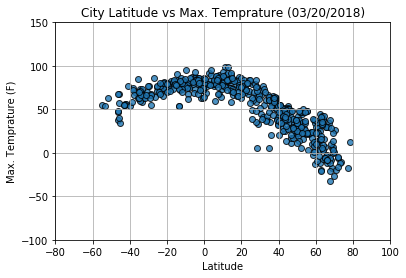

In [18]:


plt.scatter(weather_data["Latitude"],
            weather_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Max. Temprature (03/20/2018)")
plt.ylabel("Max. Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Latitude vs Temperature Plot.png",bbox_inches="tight")

# Show plot
plt.show()

### Build a scatter plot for Latitude vs Humidity Plot

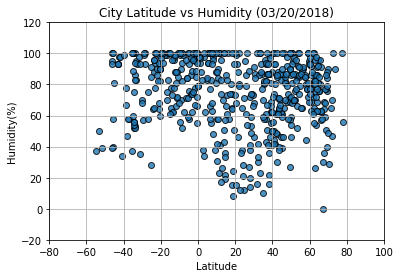

In [12]:


plt.scatter(weather_data["Latitude"],
            weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (03/20/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude vs Humidity Plot.png",bbox_inches="tight")

# Show plot
plt.show()

### Build a scatter plot for Latitude vs Cloudiness Plot

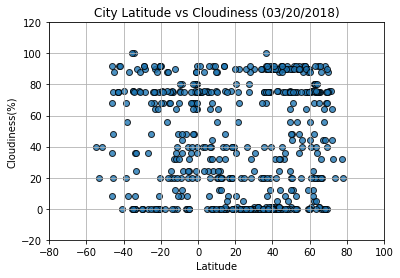

In [13]:


plt.scatter(weather_data["Latitude"],
            weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (03/20/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude vs Cloudiness Plot.png",bbox_inches="tight")

# Show plot
plt.show()

### Build a scatter plot for Latitude vs Wind Speed Plot

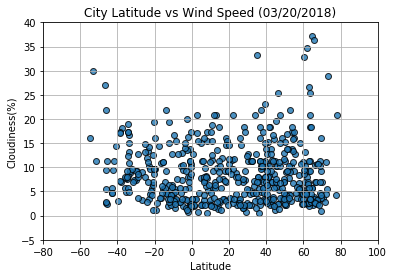

In [14]:


plt.scatter(weather_data["Latitude"],
            weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8
         )

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (03/20/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])

# Save the figure
plt.savefig("Latitude vs Wind Speed Plot.png",bbox_inches="tight")

# Show plot
plt.show()